In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import speckleret

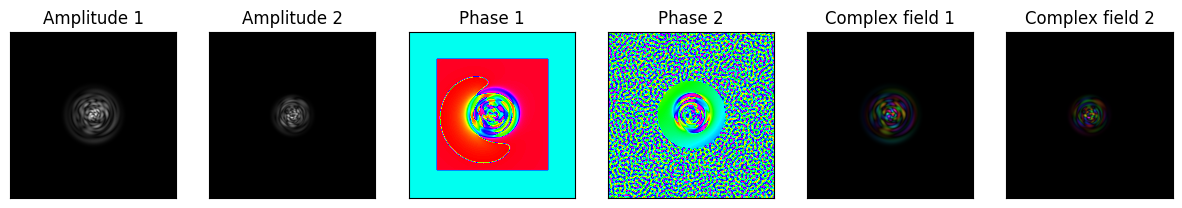

In [2]:
field = np.load('../imports/grin_speckle_example.npy')
field = speckleret.transforms.pad_img(field, pad=0.5)
ft = speckleret.transforms.fourier_transform(field, pad=None)
_ = speckleret.plots.compare_complex_fields(field, ft, remove_ticks=True)

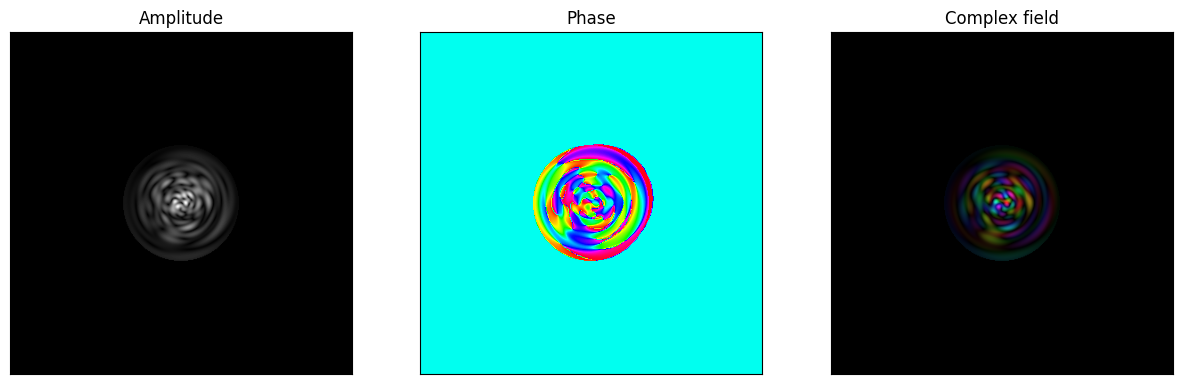

In [3]:
# support = speckleret.supports.threshold_support(field, threshold=0.01)
support = speckleret.supports.disk_support(field, radius=65)
supported_field = field * support
_ = speckleret.plots.complex_imshow(supported_field, remove_ticks=True)

In [7]:
max_iter = 300
beta = 0.9

x = np.abs(field) * np.exp(1j * 2 * np.pi * np.random.rand(*field.shape))

mse = []
quality = []
for i in range(max_iter):
    metric = speckleret.metrics.mse(speckleret.transforms.fourier_transform(x), np.abs(ft))
    q = speckleret.metrics.quality(x[support], field[support], inversed=True)
    mse.append(metric)
    quality.append(q)

    # x = speckleret.retrievalmath.ER(x=x, magnitude_S=np.abs(field), magnitude_M=np.abs(ft), support=support)
    # x = speckleret.retrievalmath.SF(x=x, magnitude_S=np.abs(field), magnitude_M=np.abs(ft), support=support)
    # x = speckleret.retrievalmath.HIO(x=x, magnitude_S=np.abs(field), magnitude_M=np.abs(ft), support=support, beta=beta)
    # x = speckleret.retrievalmath.DM(x=x, magnitude_S=np.abs(field), magnitude_M=np.abs(ft), support=support, beta=beta)
    # x = speckleret.retrievalmath.ASR(x=x, magnitude_S=np.abs(field), magnitude_M=np.abs(ft), support=support)
    # x = speckleret.retrievalmath.HPR(x=x, magnitude_S=np.abs(field), magnitude_M=np.abs(ft), support=support, beta=beta)
    x = speckleret.retrievalmath.RAAR(x=x, magnitude_S=np.abs(field), magnitude_M=np.abs(ft), support=support, beta=beta)

    if i == 0:
        q_best, x_best = q, x
    else:
        if q < q_best:
            q_best, x_best = q, x
    

Quality: 0.991690975952485
Pearson: 0.9732241416565881
Best Quality: 0.9918327249415246
Best Pearson: 0.973657156733641
Quality: 0.8296989672382195
Pearson: 0.9732241416565881
Best Quality: 0.8251444976330858
Best Pearson: 0.973657156733641


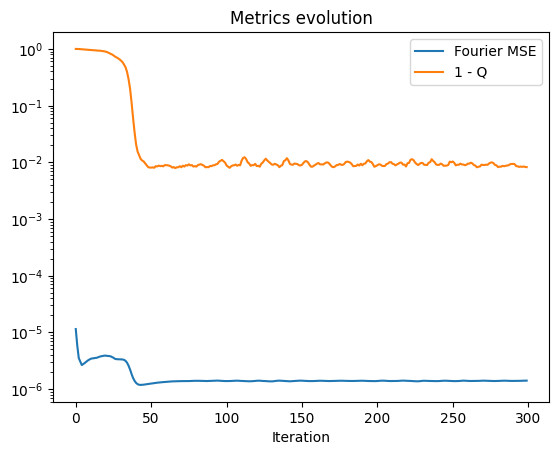

In [8]:
print(f"Quality: {speckleret.metrics.quality(x[support], field[support])}")
print(f"Pearson: {speckleret.metrics.pearson(x[support], field[support])}")
print(f"Best Quality: {speckleret.metrics.quality(x_best[support], field[support])}")
print(f"Best Pearson: {speckleret.metrics.pearson(x_best[support], field[support])}")
print(f"Quality: {speckleret.metrics.quality(np.exp(1j * np.angle(x[support])), np.exp(1j * np.angle(field[support])))}")
print(f"Pearson: {speckleret.metrics.pearson(x[support], field[support])}")
print(f"Best Quality: {speckleret.metrics.quality(np.exp(1j * np.angle(x_best[support])), np.exp(1j * np.angle(field[support])))}")
print(f"Best Pearson: {speckleret.metrics.pearson(x_best[support], field[support])}")

plt.figure()
plt.plot(mse, label='Fourier MSE')
plt.plot(quality, label='1 - Q')
plt.yscale('log')
plt.title('Metrics evolution')
plt.xlabel('Iteration')
plt.legend()

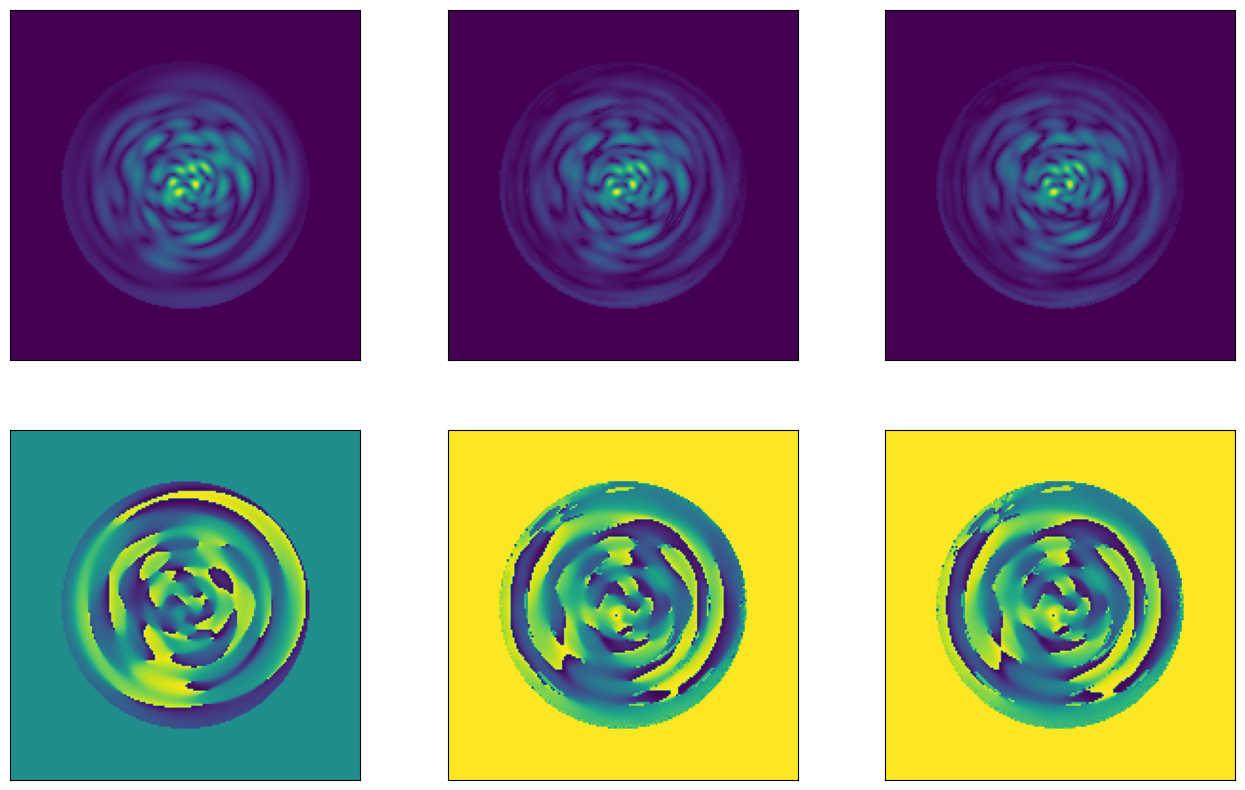

In [9]:
dcrop = 100

disp_field = field.copy()
disp_field[np.logical_not(support)] = 0
disp_field = disp_field[dcrop:-dcrop, dcrop:-dcrop]

disp_x = x.copy()
disp_x[np.logical_not(support)] = 0
disp_x = disp_x[dcrop:-dcrop, dcrop:-dcrop]

disp_best = x_best.copy()
disp_best[np.logical_not(support)] = 0
disp_best = disp_best[dcrop:-dcrop, dcrop:-dcrop]


fig, axs = plt.subplots(2, 3, figsize=(16,10))
axs[0,0].imshow(np.abs(disp_field))
axs[0,1].imshow(np.abs(disp_x))
axs[0,2].imshow(np.abs(disp_best))
axs[1,0].imshow(np.angle(disp_field * np.exp(-1j * np.angle(disp_field[50,50]))))
axs[1,1].imshow(np.angle(disp_x * np.exp(-1j * np.angle(disp_x[50,50]))))
axs[1,2].imshow(np.angle(disp_best * np.exp(-1j * np.angle(disp_best[50,50]))))

_ = [axs[i,j].set_xticks([]) for i in range(len(axs)) for j in range(len(axs[0]))]
_ = [axs[i,j].set_yticks([]) for i in range(len(axs)) for j in range(len(axs[0]))]
